In [1]:
# Install library visualisasi
%pip install pandas matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 725 kB/s eta 0:00:01
     |████████████████████████████████| 294 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 5.4 MB/s eta 0:00:011
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
df = pd.read_csv('customer-data.csv')

# 2. Tampilkan 5 data teratas
df.head()

Matplotlib is building the font cache; this may take a moment.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from sklearn.cluster import KMeans

# 1. Kita hanya ambil 2 Fitur: Income & Spending
# (Komputer lebih mudah visualisasi 2D)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 2. Panggil AI K-Means
# n_clusters=5 artinya kita minta dibagi jadi 5 kelompok
kmeans = KMeans(n_clusters=5, random_state=42)

# 3. Latih AI & Langsung Prediksi
# Hasilnya (0, 1, 2, 3, 4) disimpan di kolom baru bernama 'Cluster'
df['Cluster'] = kmeans.fit_predict(X)

# Cek hasil (lihat ada kolom baru 'Cluster' di paling kanan)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1


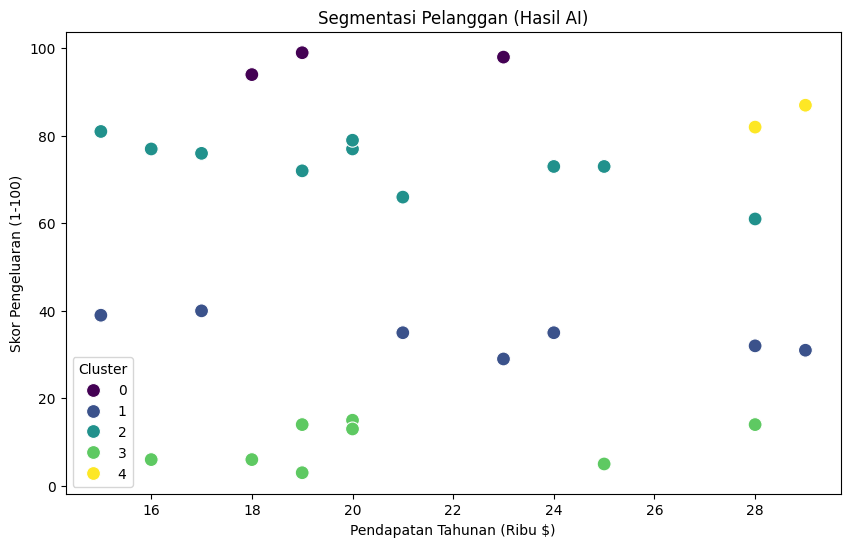

In [4]:
plt.figure(figsize=(10, 6))

# Gambar titik-titik (Scatter Plot)
# x = Gaji, y = Pengeluaran, warna (hue) = Kelompok Cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)

plt.title('Segmentasi Pelanggan (Hasil AI)')
plt.xlabel('Pendapatan Tahunan (Ribu $)')
plt.ylabel('Skor Pengeluaran (1-100)')
plt.show()

In [5]:
import joblib

# Simpan Model K-Means
joblib.dump(kmeans, 'model_clustering.pkl')

print("✅ Model berhasil disimpan sebagai 'model_clustering.pkl'")

✅ Model berhasil disimpan sebagai 'model_clustering.pkl'
